# 1.Busines Problem Understanding

**E-commerce companies face a major challenge:**
-  Most visitors don’t buy anything (only ~15% of sessions end in purchase in this dataset).
-  Companies spend heavily on ads, promotions, and traffic acquisition, but a large share of that traffic drops out without converting.

**So the business wants to answer:**
-  "Given a visitor’s browsing behavior in real-time, can we predict whether they will complete a purchase (revenue)?"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Data Understanding

In [2]:
df = pd.read_csv(r"C:\Users\kolli\Downloads\my own project datasets\online_shoppers_intention.csv")
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

-  Administrative	Integer	# of admin-related pages visited
-  Administrative_Duration	Integer	Total time spent on admin pages
-  Informational	Integer	# of informational pages visited
-  Informational_Duration	Integer	Total time spent on informational pages
-  ProductRelated	Integer	# of product-related pages visited
-  ProductRelated_Duration	Continuous	Time spent on product-related pages
-  BounceRates	Continuous	% visitors who left without further interaction
-  ExitRates	Continuous	% of exits from that page
-  PageValues	Integer	Value of the page before completing a transaction
-  SpecialDay	Integer	Closeness of visit date to special days (0–1)
-  Month	Categorical	Month of visit
-  OperatingSystems	Integer	OS used by visitor
-  Browser	Integer	Browser used
-  Region	Integer	Geographic region
-  TrafficType	Integer	Source of traffic (direct, referral, etc.)
-  VisitorType	Categorical	Returning or new visitor
-  Weekend	Binary	Whether the visit occurred on weekend
-  Revenue	Binary (Target)	1 if purchase, 0 otherwise

**Data Exploration**

In [3]:
df.shape

(12330, 18)

In [4]:
df.columns.tolist()

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [5]:
df['Administrative'].unique()

array([ 0,  1,  2,  4, 12,  3, 10,  6,  5,  9,  8, 16, 13, 11,  7, 18, 14,
       17, 19, 15, 24, 22, 21, 20, 23, 27, 26])

In [6]:
df['Administrative_Duration'].unique()

array([  0.       ,  53.       ,  64.6      , ..., 167.9107143,
       305.125    , 150.3571429])

In [7]:
df['Informational'].unique()

array([ 0,  1,  2,  4, 16,  5,  3, 14,  6, 12,  7,  9, 10,  8, 11, 24, 13])

In [8]:
df['Informational_Duration'].unique()

array([  0.  , 120.  ,  16.  , ..., 547.75, 368.25, 211.25])

In [9]:
df['ProductRelated'].unique()

array([  1,   2,  10,  19,   0,   3,  16,   7,   6,  23,  13,  20,   8,
         5,  32,   4,  45,  14,  52,   9,  46,  15,  22,  11,  12,  36,
        42,  27,  90,  18,  38,  17, 128,  25,  30,  21,  51,  26,  28,
        31,  24,  50,  96,  49,  68,  98,  67,  55,  35,  37,  29,  34,
        71,  63,  87,  40,  33,  54,  64,  75,  39, 111,  81,  61,  47,
        44,  88, 149,  41,  79,  66,  43, 258,  80,  62,  83, 173,  48,
        58,  57,  56,  69,  82,  59, 109, 287,  53,  84,  78, 137, 113,
        89,  65,  60, 104, 129,  77,  74,  93,  76,  72, 194, 140, 110,
       132, 115,  73, 328, 160,  86, 150,  95, 130, 151, 117, 124, 127,
       125, 116, 105,  92, 157, 154, 220, 187, 112, 131, 159,  94, 204,
       142, 206, 102, 313, 145,  85,  97, 198, 181, 126, 106, 101, 108,
       119,  70, 122,  91, 276, 100, 291, 114, 172, 217, 141, 133, 156,
       136, 180, 135, 195,  99, 362, 179, 118, 175, 148, 440, 103, 178,
       184, 705, 134, 176, 146, 189, 120, 193, 222, 121, 107, 30

In [10]:
df['ProductRelated_Duration'].unique()

array([  0.        ,  64.        ,   2.66666667, ..., 465.75      ,
       184.25      , 346.        ])

In [11]:
df['BounceRates'].unique()

array([0.2       , 0.        , 0.05      , ..., 0.00382775, 0.00086956,
       0.01114899])

In [12]:
df['ExitRates'].unique()

array([0.2       , 0.1       , 0.14      , ..., 0.01276133, 0.01395349,
       0.02903061])

In [13]:
df['PageValues'].unique()

array([ 0.        , 54.17976426, 19.44707913, ..., 78.81172527,
        3.68540082, 12.24171745])

In [14]:
df['SpecialDay'].unique()

array([0. , 0.4, 0.8, 1. , 0.2, 0.6])

In [15]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [16]:
df['OperatingSystems'].unique()

array([1, 2, 4, 3, 7, 6, 8, 5])

In [17]:
df['Browser'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 10,  8,  9, 12, 13, 11])

In [18]:
df['Region'].unique()

array([1, 9, 2, 3, 4, 5, 6, 7, 8])

In [19]:
df['TrafficType'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       16, 17, 20])

In [20]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [21]:
df['Weekend'].unique()

array([False,  True])

In [22]:
df['Revenue'].unique()

array([False,  True])

In [23]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [24]:
continuous  = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
               'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

Count = ['Administrative', 'Informational', 'ProductRelated']

**Exploratory Data Analysis**

In [25]:
df[continuous].describe()

Administrative_Duration  Informational_Duration  \
count             12330.000000            12330.000000   
mean                 80.818611               34.472398   
std                 176.779107              140.749294   
min                   0.000000                0.000000   
25%                   0.000000                0.000000   
50%                   7.500000                0.000000   
75%                  93.256250                0.000000   
max                3398.750000             2549.375000   

       ProductRelated_Duration   BounceRates     ExitRates    PageValues  \
count             12330.000000  12330.000000  12330.000000  12330.000000   
mean               1194.746220      0.022191      0.043073      5.889258   
std                1913.669288      0.048488      0.048597     18.568437   
min                   0.000000      0.000000      0.000000      0.000000   
25%                 184.137500      0.000000      0.014286      0.000000   
50%                 598.936905      0.003112      0.025156      0.000000   
75%                1464.157214      0.016813      0.050000      0.000000   
max               63973.522230      0.200000      0.200000    361.763742   

         SpecialDay  
count  12330.000000  
mean       0.061427  
std        0.198917  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [26]:
df[continuous].skew()

Administrative_Duration    5.615719
Informational_Duration     7.579185
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
dtype: float64

In [27]:
# Convert numeric categorical columns into 'category' dtype
for col in ["OperatingSystems", "Browser", "Region", "TrafficType", "Month", "VisitorType", "Weekend"]:
    df[col] = df[col].astype("category")

In [28]:
df[categorical].describe()

Month  OperatingSystems  Browser  Region  TrafficType  \
count   12330             12330    12330   12330        12330   
unique     10                 8       13       9           20   
top       May                 2        2       1            2   
freq     3364              6601     7961    4780         3913   

              VisitorType Weekend Revenue  
count               12330   12330   12330  
unique                  3       2       2  
top     Returning_Visitor   False   False  
freq                10551    9462   10422

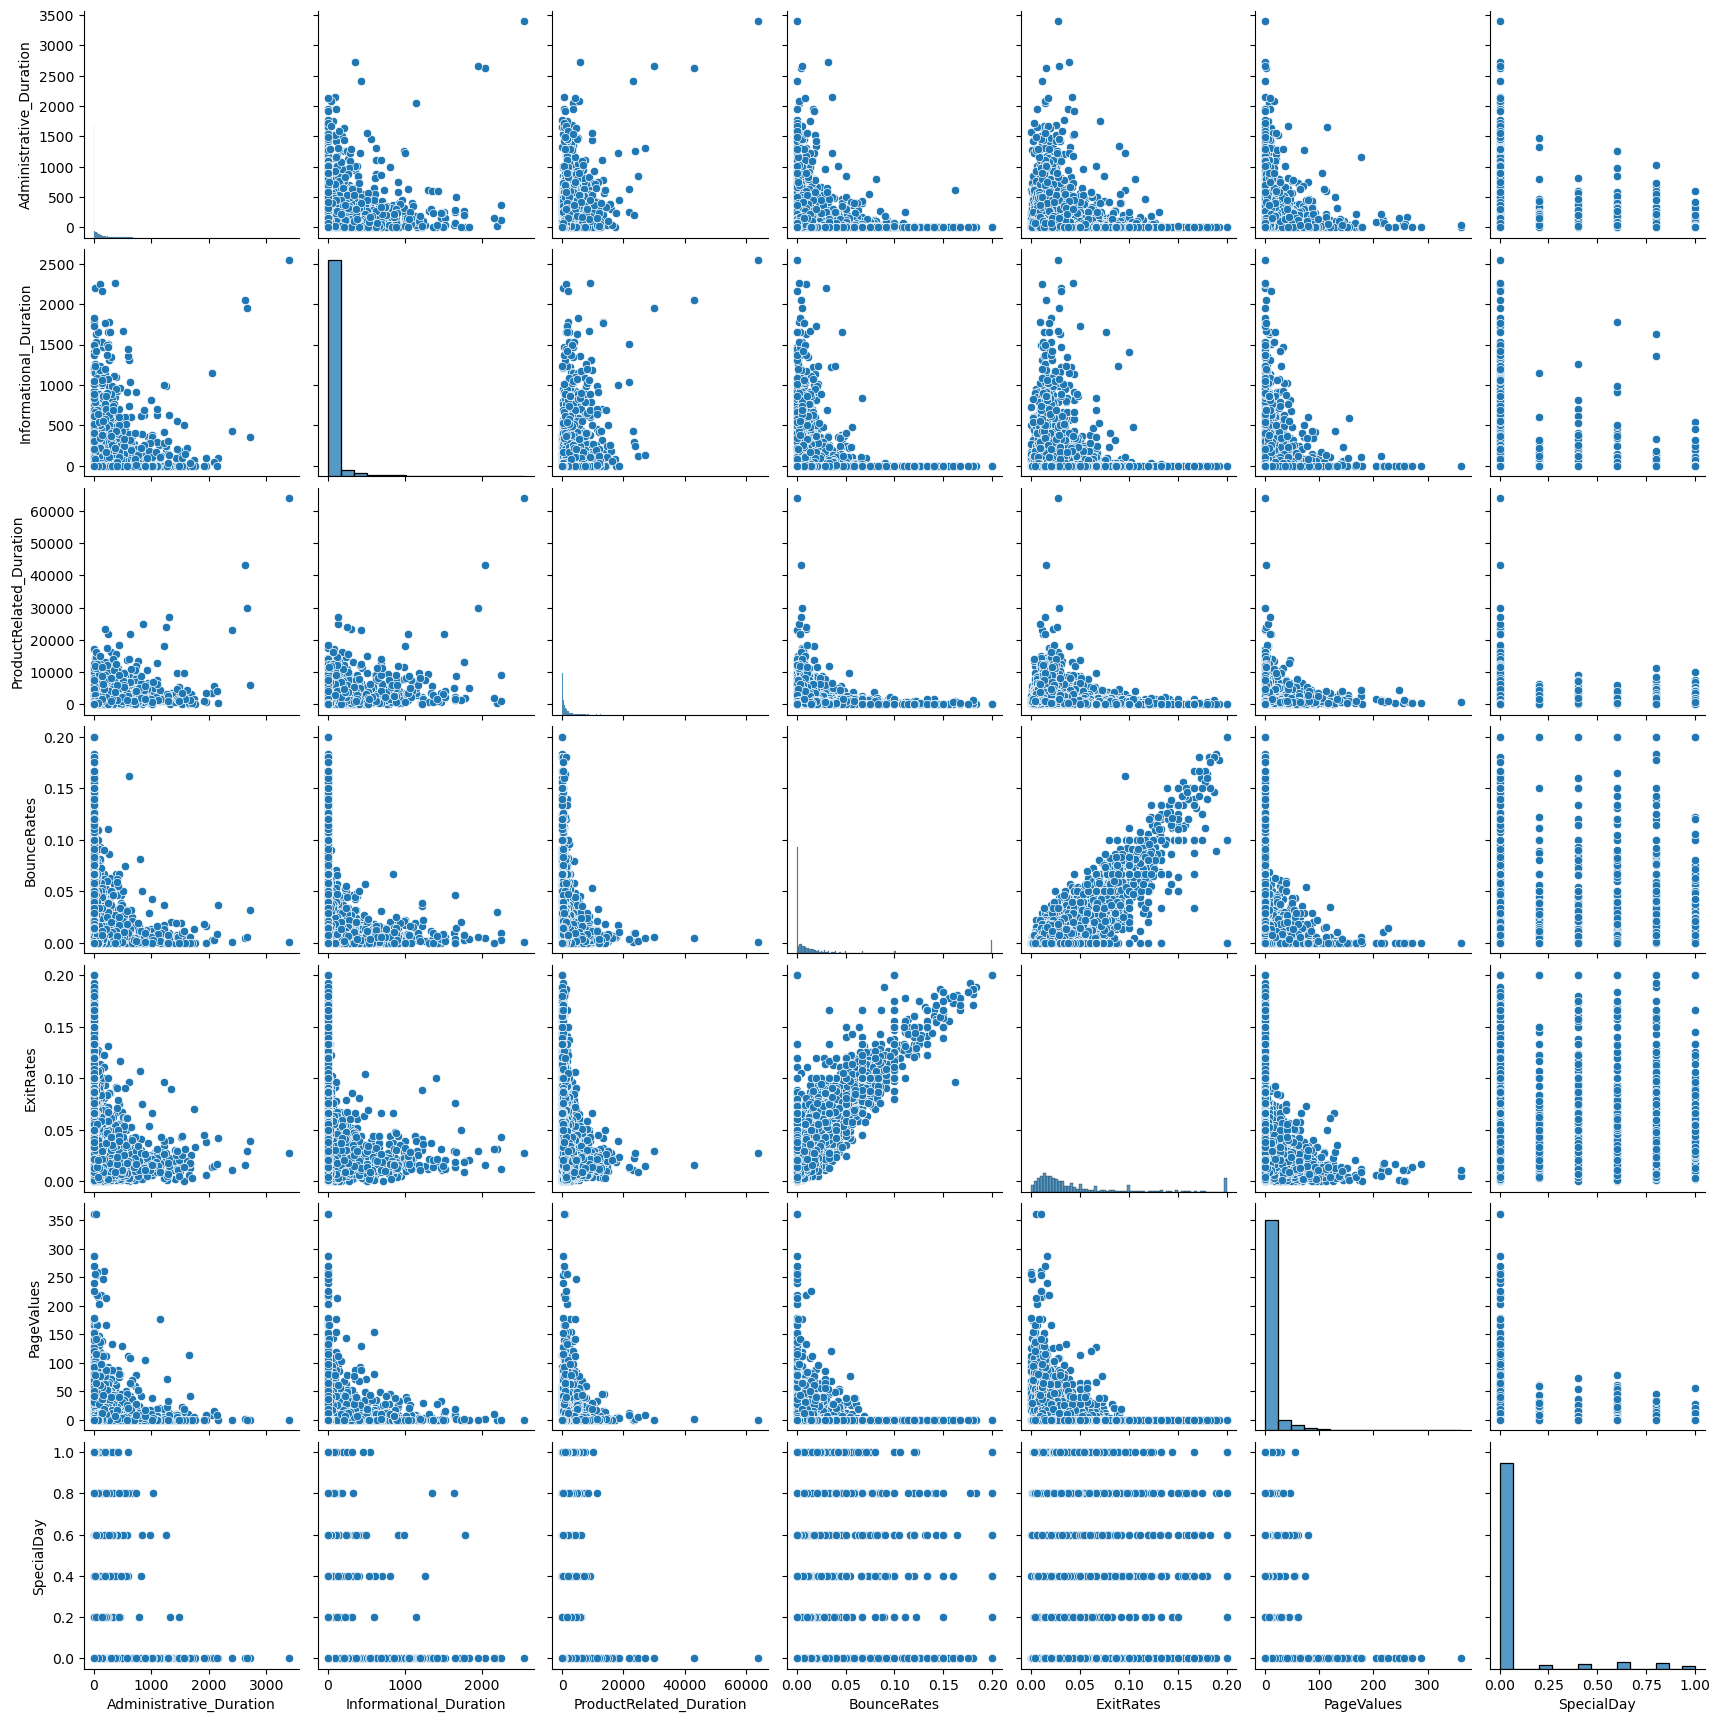

In [29]:
sns.pairplot(df,vars=continuous)
plt.show()

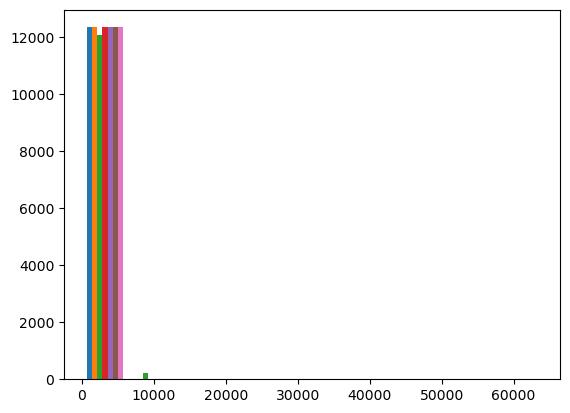

In [30]:
plt.hist(df[continuous])
plt.show()

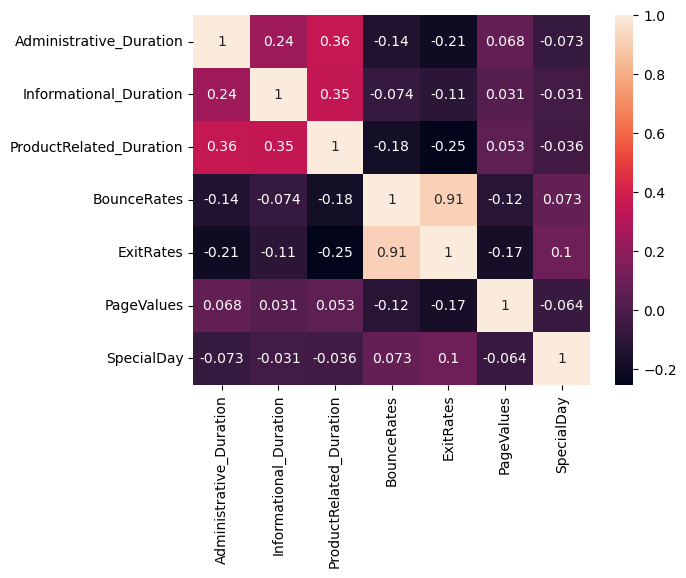

In [31]:
sns.heatmap(df[continuous].corr(), annot = True)
plt.show()

In [32]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

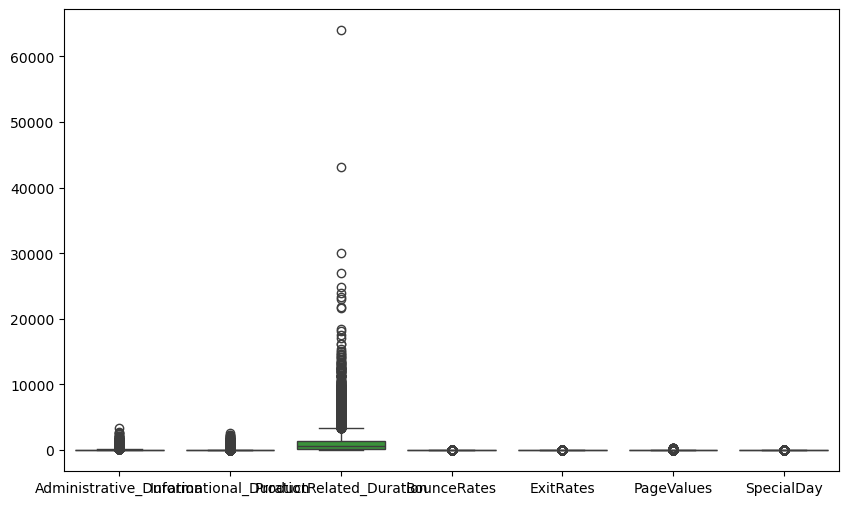

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(df[continuous])
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [35]:
continuous  = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
               'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

Count = ['Administrative', 'Informational', 'ProductRelated']

# 3.Data Preprocessing

**Data Cleaning**
-  treat wrong data
-  treat wrong data type
-  treat missing values
-  treat duplicates
-  treat outliers

In [36]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                1   
1         0.00       0.10         0.0         0.0   Feb                2   
2         0.20       0.20         0.0         0.0   Feb                4   
3         0.05       0.14         0.0         0.0   Feb                3   
4         0.02       0.05         0.0         0.0   Feb                3   

  Browser Region TrafficType        VisitorType Weekend  Revenue  
0       1      1           1  Returning_Visitor   False    False  
1       2      1           2  Returning_Visitor   False    False  
2       1      9           3  Returning_Visitor   False    False  
3       2      2           4  Returning_Visitor   False    False  
4       3      1           4  Returning_Visitor    True    False

**treat wrong data types**

In [37]:
df.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                    category
Revenue                        bool
dtype: object

In [38]:
df["Weekend"] = df["Weekend"].astype(bool)

In [39]:
df.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                        bool
Revenue                        bool
dtype: object

**treat missing values**

In [40]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**Treat Duplicates**

In [41]:
df.duplicated().sum()

np.int64(125)

In [42]:
df = df.drop_duplicates(keep='first')

**Treat Outliers**

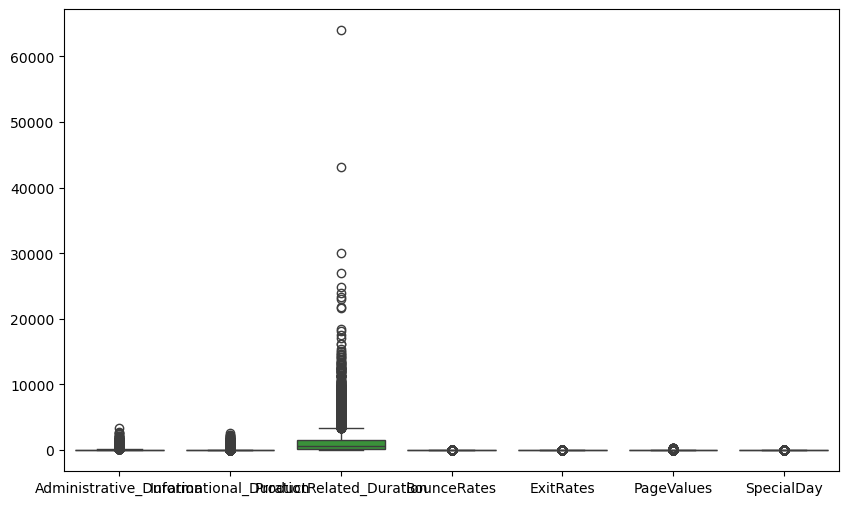

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(df[continuous])
plt.show()

In [44]:
Q1 = df[continuous].quantile(0.25)
print('Q1:',Q1)

Q3 = df[continuous].quantile(0.75)
print('Q3:',Q3)

IQR = Q3 - Q1
print("IQR:",IQR)

lower_limit = Q1 - (IQR * 1.5)
print('lower_limit:',lower_limit)

upper_limit = Q3 + (IQR * 1.5)
print('upper_limit:', upper_limit)

Q1: Administrative_Duration      0.000000
Informational_Duration       0.000000
ProductRelated_Duration    193.000000
BounceRates                  0.000000
ExitRates                    0.014231
PageValues                   0.000000
SpecialDay                   0.000000
Name: 0.25, dtype: float64
Q3: Administrative_Duration      94.700000
Informational_Duration        0.000000
ProductRelated_Duration    1477.154762
BounceRates                   0.016667
ExitRates                     0.048529
PageValues                    0.000000
SpecialDay                    0.000000
Name: 0.75, dtype: float64
IQR: Administrative_Duration      94.700000
Informational_Duration        0.000000
ProductRelated_Duration    1284.154762
BounceRates                   0.016667
ExitRates                     0.034298
PageValues                    0.000000
SpecialDay                    0.000000
dtype: float64
lower_limit: Administrative_Duration    -142.050000
Informational_Duration        0.000000
ProductRelated_

In [45]:
df = df[(df["Administrative_Duration"] <= 236.75) &
        (df["ProductRelated_Duration"] <= 3403.38)]

**Feature Transformations**

In [46]:
df[continuous].skew()

Administrative_Duration    1.601235
Informational_Duration     9.681751
ProductRelated_Duration    1.322381
BounceRates                2.878509
ExitRates                  2.024852
PageValues                 6.670136
SpecialDay                 3.138350
dtype: float64

In [47]:
df['Administrative_Duration_root'] = df['Administrative_Duration'] ** (1/4)
df['Administrative_Duration_root'].skew()

np.float64(0.395326642303669)

In [48]:
df['Administrative_Duration_log'] = np.log(df['Administrative_Duration'] + 0.01)
df['Administrative_Duration_log'].skew()

np.float64(0.22845412023021547)

In [49]:
df['Informational_Duration_root'] = df['Informational_Duration'] ** (1/4)
df['Informational_Duration_root'].skew()

np.float64(2.55358356199052)

In [50]:
df['Informational_Duration_log'] = np.log(df['Informational_Duration'] + 0.01)
df['Informational_Duration_log'].skew()

np.float64(2.11022047366289)

In [51]:
df['ProductRelated_Duration_root'] = df['ProductRelated_Duration'] ** (1/2)
df['ProductRelated_Duration_root'].skew()

np.float64(0.3510572031103432)

In [52]:
df['ProductRelated_Duration_log'] = np.log(df['ProductRelated_Duration'] + 0.01)
df['ProductRelated_Duration_log'].skew()

np.float64(-2.591598633724754)

In [53]:
df['BounceRates_root'] = df['BounceRates'] ** (1/8)
df['BounceRates_root'].skew()

np.float64(0.09597329074434922)

In [54]:
df['BounceRates_log'] = np.log(df['BounceRates'] + 0.01)
df['BounceRates_log'].skew()

np.float64(1.4006213509749115)

In [55]:
df['ExitRates_root'] = df['ExitRates'] ** (1/5)
df['ExitRates_root'].skew()

np.float64(-0.2836297203833808)

In [56]:
df['ExitRates_log'] = np.log(df['ExitRates'] + 0.01)
df['ExitRates_log'].skew()

np.float64(0.5350659497299867)

In [57]:
df['PageValues_root']= df['PageValues'] ** (1/4)
df['PageValues_root'].skew()

np.float64(1.9521571458101825)

In [58]:
df['PageValues_log'] = np.log(df['PageValues'] + 0.01)
df['PageValues_log'].skew()

np.float64(1.7519856909611222)

In [59]:
df['SpecialDay_root'] = df['SpecialDay'] ** (1/2)
df['SpecialDay_root'].skew()

np.float64(2.726485416473531)

In [60]:
df['SpecialDay_log'] = np.log(df['SpecialDay'] + 0.01)
df['SpecialDay_log'].skew()

np.float64(2.572317496078025)

In [61]:
df.drop(columns = ['Administrative_Duration', 'Administrative_Duration_root', 'Informational_Duration',
                   'Informational_Duration_root', 'ProductRelated_Duration', 'ProductRelated_Duration_log',
                   'BounceRates', 'BounceRates_log', 'ExitRates', 'ExitRates_log', 'PageValues', 
                   'PageValues_root', 'SpecialDay', 'SpecialDay_root'], inplace = True)

In [62]:
df.head()

Administrative  Informational  ProductRelated Month OperatingSystems  \
0               0              0               1   Feb                1   
1               0              0               2   Feb                2   
2               0              0               1   Feb                4   
3               0              0               2   Feb                3   
4               0              0              10   Feb                3   

  Browser Region TrafficType        VisitorType  Weekend  Revenue  \
0       1      1           1  Returning_Visitor    False    False   
1       2      1           2  Returning_Visitor    False    False   
2       1      9           3  Returning_Visitor    False    False   
3       2      2           4  Returning_Visitor    False    False   
4       3      1           4  Returning_Visitor     True    False   

   Administrative_Duration_log  Informational_Duration_log  \
0                     -4.60517                    -4.60517   
1                     -4.60517                    -4.60517   
2                     -4.60517                    -4.60517   
3                     -4.60517                    -4.60517   
4                     -4.60517                    -4.60517   

   ProductRelated_Duration_root  BounceRates_root  ExitRates_root  \
0                      0.000000          0.817765        0.724780   
1                      8.000000          0.000000        0.630957   
2                      0.000000          0.817765        0.724780   
3                      1.632993          0.687656        0.674879   
4                     25.049950          0.613238        0.549280   

   PageValues_log  SpecialDay_log  
0        -4.60517        -4.60517  
1        -4.60517        -4.60517  
2        -4.60517        -4.60517  
3        -4.60517        -4.60517  
4        -4.60517        -4.60517

**Feature Encoding**

In [63]:
# Encode binary categorical (Weekend, VisitorType)
df['Weekend'] = df['Weekend'].astype(int)  # True/False → 1/0

# Encode VisitorType
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['VisitorType'] = le.fit_transform(df['VisitorType'])

# Encode Month (ordinal or one-hot, better one-hot)
df = pd.get_dummies(df, columns=['Month'], drop_first=True)

# Same for OperatingSystems, Browser, Region, TrafficType (if needed)
df = pd.get_dummies(df, columns=['OperatingSystems','Browser','Region','TrafficType'], drop_first=True)


In [64]:
#save the dataFrame
df.to_excel("Ecommerce cleaned.xlsx", index = False)

In [65]:
df.head()

Administrative  Informational  ProductRelated  VisitorType  Weekend  \
0               0              0               1            2        0   
1               0              0               2            2        0   
2               0              0               1            2        0   
3               0              0               2            2        0   
4               0              0              10            2        1   

   Revenue  Administrative_Duration_log  Informational_Duration_log  \
0    False                     -4.60517                    -4.60517   
1    False                     -4.60517                    -4.60517   
2    False                     -4.60517                    -4.60517   
3    False                     -4.60517                    -4.60517   
4    False                     -4.60517                    -4.60517   

   ProductRelated_Duration_root  BounceRates_root  ...  TrafficType_11  \
0                      0.000000          0.817765  ...           False   
1                      8.000000          0.000000  ...           False   
2                      0.000000          0.817765  ...           False   
3                      1.632993          0.687656  ...           False   
4                     25.049950          0.613238  ...           False   

   TrafficType_12  TrafficType_13  TrafficType_14  TrafficType_15  \
0           False           False           False           False   
1           False           False           False           False   
2           False           False           False           False   
3           False           False           False           False   
4           False           False           False           False   

   TrafficType_16  TrafficType_17  TrafficType_18  TrafficType_19  \
0           False           False           False           False   
1           False           False           False           False   
2           False           False           False           False   
3           False           False           False           False   
4           False           False           False           False   

   TrafficType_20  
0           False  
1           False  
2           False  
3           False  
4           False  

[5 rows x 68 columns]

**X & Y**

In [66]:
X = df.drop('Revenue', axis = 1)
y = df['Revenue']

**Train_Test_Split**

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Check the data is balance or imbalance data**

In [68]:
# Count of each class
print(df['Revenue'].value_counts())

# Percentage distribution
print(df['Revenue'].value_counts(normalize=True) * 100)

Revenue
False    8946
True     1425
Name: count, dtype: int64
Revenue
False    86.259763
True     13.740237
Name: proportion, dtype: float64


**Applying Oversampling with Smote**

In [71]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Revenue
False    7137
True     1159
Name: count, dtype: int64
After SMOTE: Revenue
False    7137
True     7137
Name: count, dtype: int64


**Feature Scalling**

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scal = sc.fit_transform(X_train_res)
X_test_scal = sc.transform(X_test)

# 4 & 5.Modelling & Evaluation

# Logistic Regression

In [73]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Train Logistic Regression
l = LogisticRegression(max_iter=1000, random_state=42)  # added max_iter for convergence
l.fit(X_train_scal, y_train_res)

# Predictions
y_pred_train = l.predict(X_train_scal)
y_pred_test = l.predict(X_test_scal)

print("Train F1-score:", f1_score(y_train_res, y_pred_train, average='weighted'))

cv_scores = cross_val_score(l, X_train_scal, y_train_res, cv=5, scoring="f1_weighted")
print("Cross-validation F1-score:", cv_scores.mean())

print("Test F1-score:", f1_score(y_test, y_pred_test, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, digits=4))

Train F1-score: 0.9285943444723515
Cross-validation F1-score: 0.9031522826543537
Test F1-score: 0.9071305523879191

Classification Report:
              precision    recall  f1-score   support

       False     0.9528    0.9375    0.9451      1809
        True     0.6169    0.6842    0.6488       266

    accuracy                         0.9051      2075
   macro avg     0.7849    0.8109    0.7970      2075
weighted avg     0.9098    0.9051    0.9071      2075



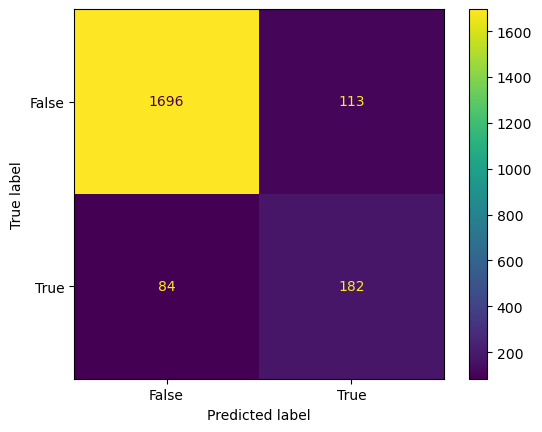

In [74]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [75]:
from sklearn.metrics import roc_auc_score

print("Train ROC AUC:", roc_auc_score(y_train_res, y_pred_train))
print("Test ROC AUC:", roc_auc_score(y_test, y_pred_test))

Train ROC AUC: 0.9286114613983467
Test ROC AUC: 0.8108725378953187


# KNN Classifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {"n_neighbors":list(range(1,100))}

from sklearn.model_selection import GridSearchCV
cv_classifier = GridSearchCV(estimator,param_grid,cv=5,scoring="f1_weighted")

cv_classifier.fit(X_train_scal,y_train_res)

cv_classifier.best_params_

{'n_neighbors': 3}

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scal, y_train_res)

y_pred_train = knn.predict(X_train_scal)
y_pred_test = knn.predict(X_test_scal)

print("Train F1-score:", f1_score(y_train_res, y_pred_train, average='weighted'))

cv_scores = cross_val_score(knn, X_train_scal, y_train_res, cv=5, scoring="f1_weighted")
print("Cross-validation F1-score:", cv_scores.mean())

print("Test F1-score:", f1_score(y_test, y_pred_test, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, digits=4))


Train F1-score: 0.9603470365364761
Cross-validation F1-score: 0.9143431168365895
Test F1-score: 0.8479211391018621

Classification Report:
              precision    recall  f1-score   support

       False     0.9157    0.9066    0.9111      1809
        True     0.4049    0.4323    0.4182       266

    accuracy                         0.8458      2075
   macro avg     0.6603    0.6695    0.6646      2075
weighted avg     0.8502    0.8458    0.8479      2075



# Support Vector Machine(SVM)

In [78]:
from sklearn.svm import SVC

estimator = SVC()
param_grid = {"C":[0.01,0.1,1,10],"kernel":["linear","poly","rbf","sigmoid"]}

svm_grid= GridSearchCV(estimator, param_grid,scoring = "f1_weighted", cv=5)
svm_grid.fit(X_train_scal,y_train_res)

svm_grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [79]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm = SVC(C=1, kernel="rbf", random_state=42)
svm.fit(X_train_scal, y_train_res)

y_pred_train = svm.predict(X_train_scal)
y_pred_test = svm.predict(X_test_scal)

print("Train F1-score:", f1_score(y_train_res, y_pred_train, average='weighted'))

cv_scores = cross_val_score(svm, X_train_scal, y_train_res, cv=5, scoring="f1_weighted")
print("Cross-validation F1-score:", cv_scores.mean())

print("Test F1-score:", f1_score(y_test, y_pred_test, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, digits=4))


Train F1-score: 0.9547411689756595
Cross-validation F1-score: 0.917708954556983
Test F1-score: 0.9189145395042867

Classification Report:
              precision    recall  f1-score   support

       False     0.9581    0.9469    0.9525      1809
        True     0.6655    0.7180    0.6908       266

    accuracy                         0.9176      2075
   macro avg     0.8118    0.8325    0.8216      2075
weighted avg     0.9206    0.9176    0.9189      2075



 # Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scal, y_train_res)

y_pred_train = dt.predict(X_train_scal)
y_pred_test = dt.predict(X_test_scal)

# Train F1-score
print("Train F1-score:", f1_score(y_train_res, y_pred_train, average='weighted'))

# Test F1-score
print("Test F1-score:", f1_score(y_test, y_pred_test, average='weighted'))

# Classification Report (Test)
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test, digits=4))

Train F1-score: 1.0
Test F1-score: 0.8784439735225487

Classification Report (Test):
              precision    recall  f1-score   support

       False     0.9452    0.9055    0.9249      1809
        True     0.5000    0.6429    0.5625       266

    accuracy                         0.8718      2075
   macro avg     0.7226    0.7742    0.7437      2075
weighted avg     0.8881    0.8718    0.8784      2075



In [81]:
dt.feature_importances_

array([1.29740688e-02, 6.95351106e-03, 2.95527508e-02, 4.12155041e-03,
       5.21271844e-03, 2.63688112e-02, 6.02572697e-03, 3.50017031e-02,
       3.79703019e-02, 3.33015029e-02, 5.90079177e-01, 3.71174714e-04,
       1.81382623e-02, 0.00000000e+00, 9.73400857e-03, 2.02763058e-03,
       6.26667714e-04, 5.01459668e-04, 6.08673843e-02, 7.09446866e-03,
       1.38298867e-02, 2.06542011e-03, 2.17927042e-03, 9.19100608e-04,
       0.00000000e+00, 2.58011079e-04, 0.00000000e+00, 1.56232285e-03,
       1.06554838e-02, 2.79049227e-05, 4.35045932e-03, 2.78959458e-03,
       1.28483258e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.11703305e-03, 0.00000000e+00, 1.11712059e-03, 0.00000000e+00,
       1.02335396e-03, 3.87835569e-03, 3.32531527e-03, 1.37934337e-03,
       1.62332591e-03, 2.07511040e-03, 2.50609862e-03, 1.02641509e-03,
       2.69390795e-02, 5.12691193e-03, 3.04920560e-03, 5.30549480e-03,
       2.60598178e-03, 2.27543821e-04, 5.00701321e-03, 0.00000000e+00,
      

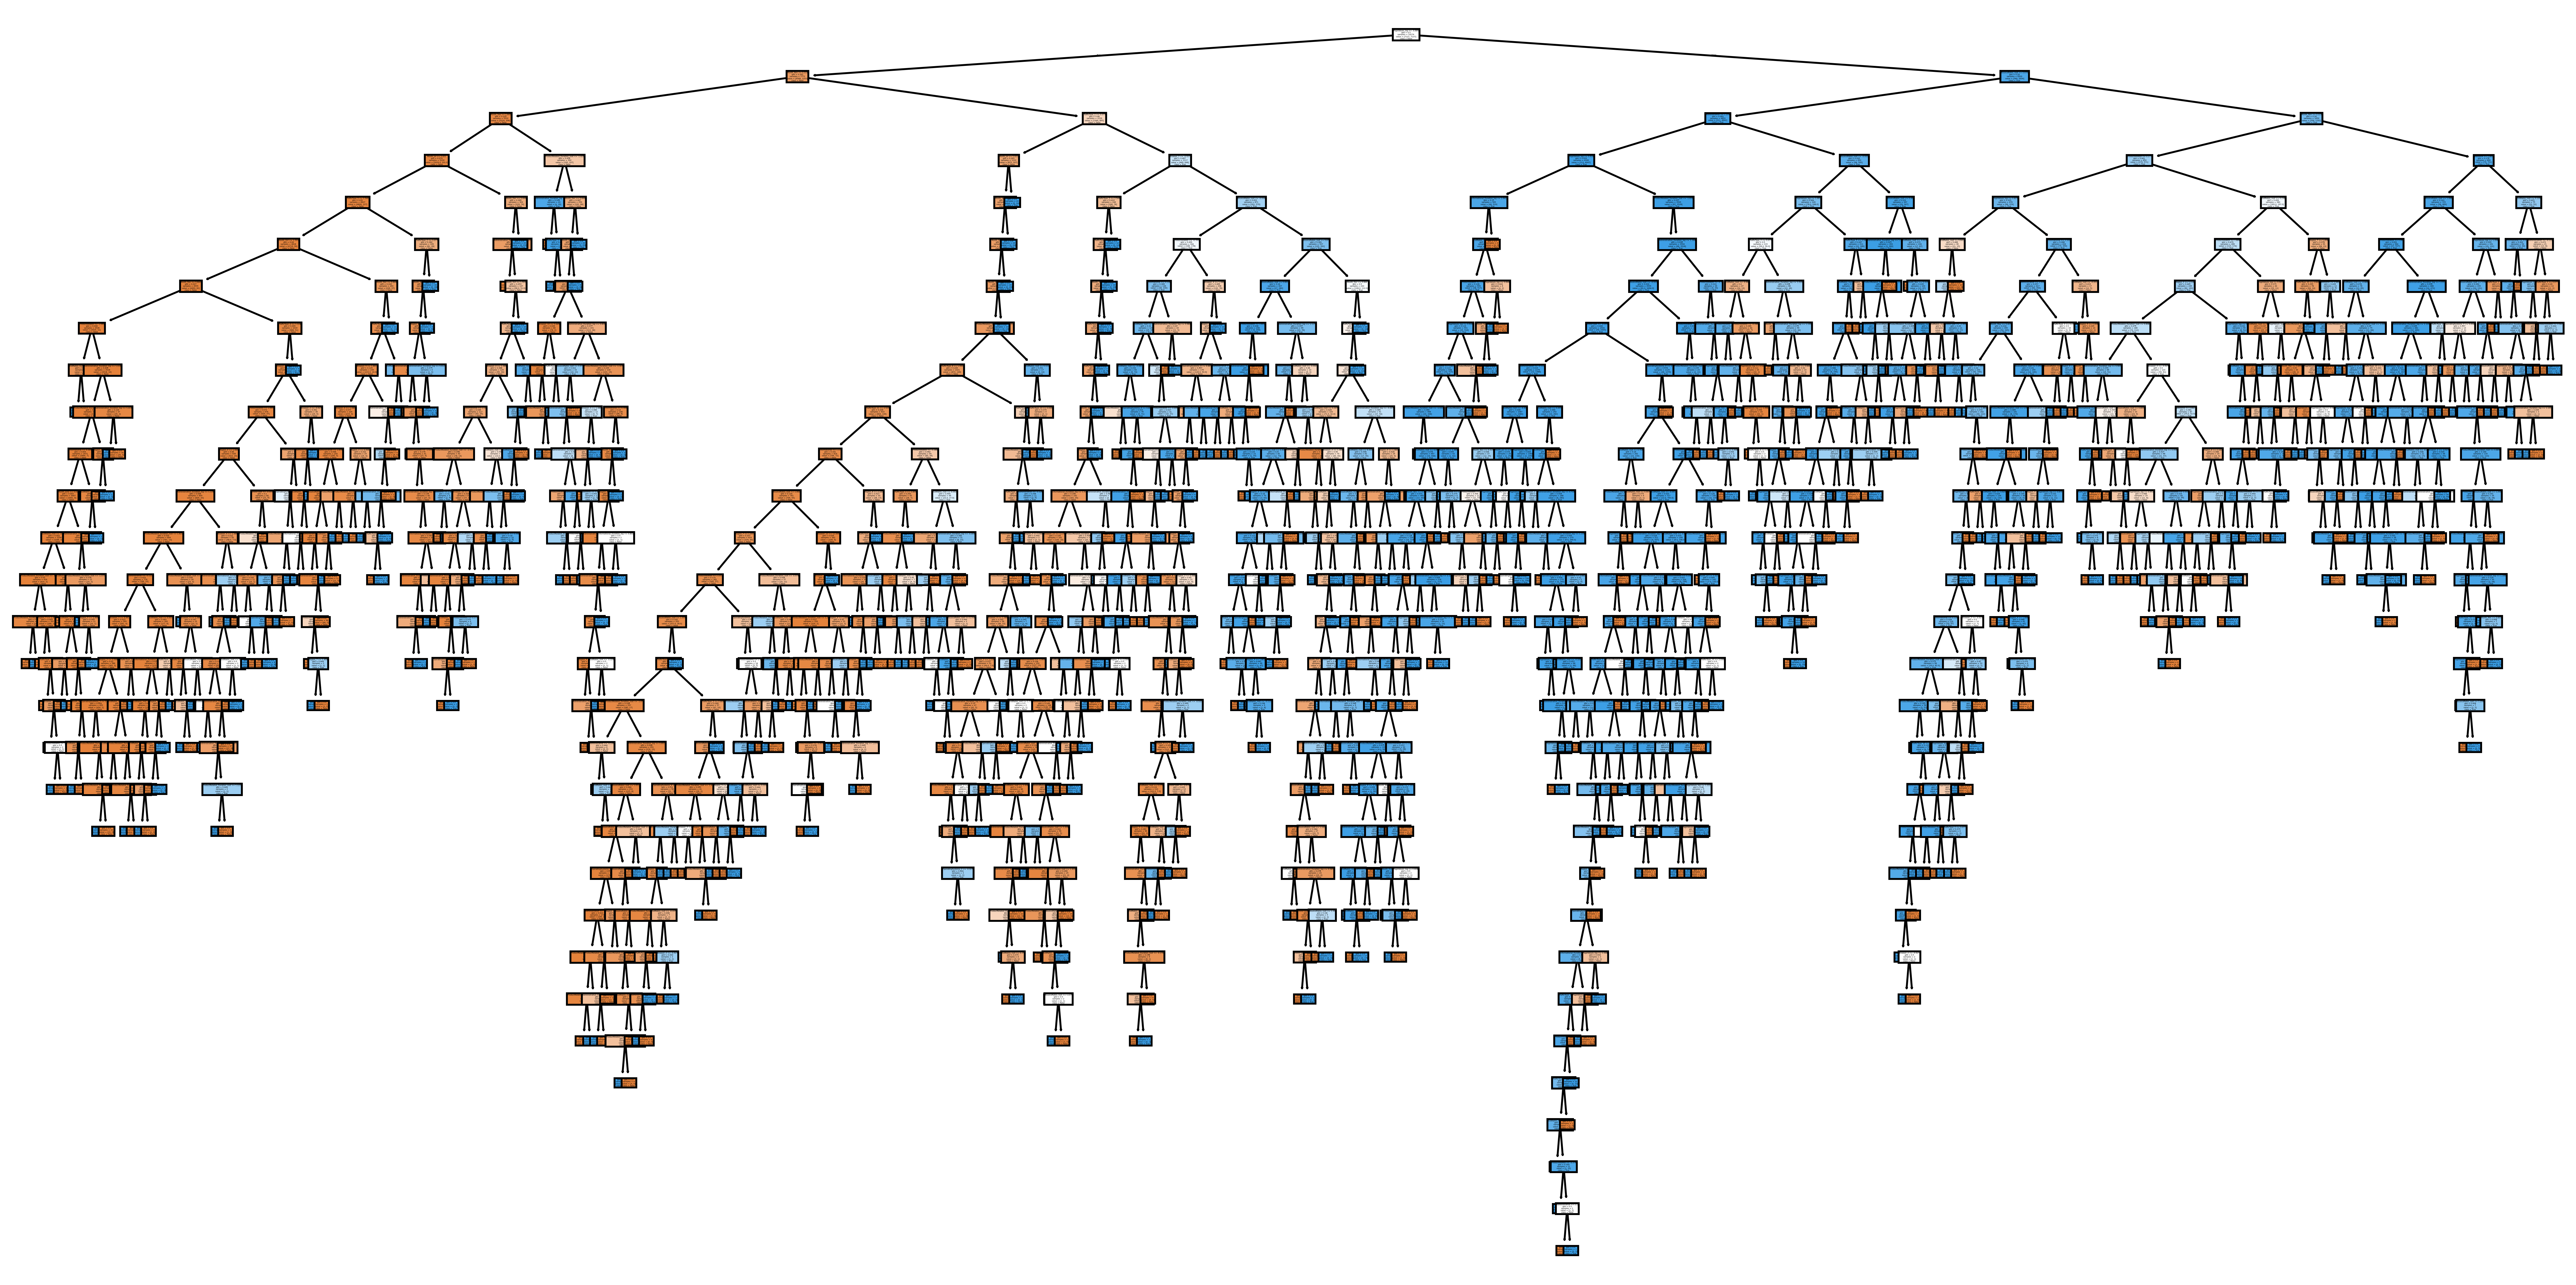

In [82]:
from sklearn.tree import plot_tree
feature_names = df.drop("Revenue", axis=1).columns.tolist()

plt.figure(figsize=(24,12), dpi=500)
plot_tree(dt, 
          filled=True,
          feature_names=feature_names,  
          class_names=["False", "True"])
plt.show()

In [83]:
estimator = DecisionTreeClassifier(random_state=42)
param_grid = {"criterion":["gini","entropy"],"max_depth":list(range(1,17))}

grid = GridSearchCV(estimator,param_grid,scoring="f1_weighted",cv=5)
grid.fit(X_train_scal,y_train_res)

grid.best_params_

{'criterion': 'gini', 'max_depth': 12}

In [84]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                    index=X.columns,
                    columns=["Feature Importacne"])
feats
feats_im = feats[feats["Feature Importacne"]>0]
imp_features = feats_im.index.to_list()
imp_features

['Administrative',
 'Informational',
 'ProductRelated',
 'VisitorType',
 'Weekend',
 'Administrative_Duration_log',
 'Informational_Duration_log',
 'ProductRelated_Duration_root',
 'BounceRates_root',
 'ExitRates_root',
 'PageValues_log',
 'SpecialDay_log',
 'Month_Dec',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'OperatingSystems_2',
 'OperatingSystems_3',
 'OperatingSystems_4',
 'OperatingSystems_6',
 'OperatingSystems_8',
 'Browser_2',
 'Browser_4',
 'Browser_5',
 'Browser_6',
 'Browser_10',
 'Region_2',
 'Region_3',
 'Region_4',
 'Region_5',
 'Region_6',
 'Region_7',
 'Region_8',
 'Region_9',
 'TrafficType_2',
 'TrafficType_3',
 'TrafficType_4',
 'TrafficType_5',
 'TrafficType_6',
 'TrafficType_7',
 'TrafficType_8',
 'TrafficType_10',
 'TrafficType_11',
 'TrafficType_13',
 'TrafficType_20']

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, classification_report

# Train-test split
x1 = X[imp_features]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, train_size=0.8, random_state=42, stratify=y)

dt = DecisionTreeClassifier(criterion="gini", max_depth=12, random_state=42)
dt.fit(x1_train, y1_train)

y1_pred_train = dt.predict(x1_train)
y1_pred_test = dt.predict(x1_test)

print("Train F1-score:", f1_score(y1_train, y1_pred_train, average='weighted'))

cv_scores = cross_val_score(dt, x1_train, y1_train, cv=5, scoring="f1_weighted")
print("Cross-validation F1-score:", cv_scores.mean())

print("Test F1-score:", f1_score(y1_test, y1_pred_test, average='weighted'))

print("\nClassification Report:")
print(classification_report(y1_test, y1_pred_test, digits=4))


Train F1-score: 0.978609121418116
Cross-validation F1-score: 0.8922526481184269
Test F1-score: 0.8818071623142653

Classification Report:
              precision    recall  f1-score   support

       False     0.9245    0.9441    0.9342      1790
        True     0.5951    0.5158    0.5526       285

    accuracy                         0.8853      2075
   macro avg     0.7598    0.7300    0.7434      2075
weighted avg     0.8793    0.8853    0.8818      2075



# Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

estimator =RandomForestClassifier(random_state=42)
param_grid = {"n_estimators":list(range(1,10))}

grid = GridSearchCV(estimator,param_grid,scoring="f1_weighted",cv=5)
grid.fit(X_train_scal,y_train_res)
grid.best_params_

{'n_estimators': 9}

In [87]:
grid.best_estimator_.feature_importances_

array([2.56353102e-02, 8.84767754e-03, 4.32347919e-02, 2.99930329e-02,
       8.48137950e-03, 3.02193703e-02, 1.15052405e-02, 6.17834657e-02,
       8.64013274e-02, 4.80830682e-02, 3.74369766e-01, 1.00820189e-02,
       7.91927625e-03, 6.55689330e-05, 5.09584200e-03, 1.44370446e-03,
       5.22990016e-03, 9.14985613e-03, 4.81221942e-02, 5.93562067e-03,
       8.92853962e-03, 1.89077899e-02, 1.26189491e-02, 3.42558894e-03,
       5.14276060e-05, 2.98644931e-04, 0.00000000e+00, 5.03582630e-04,
       1.26529781e-02, 4.03839807e-04, 5.10801910e-03, 3.42316932e-03,
       1.21665684e-03, 2.18392206e-04, 1.57879260e-03, 0.00000000e+00,
       1.60043540e-03, 0.00000000e+00, 9.96458005e-04, 7.66690105e-04,
       5.94094789e-03, 8.38019107e-03, 6.21709387e-03, 1.53136416e-03,
       4.51884134e-03, 4.79569702e-03, 3.09228126e-03, 2.85390016e-03,
       3.18927313e-02, 4.95806961e-03, 6.29711027e-03, 3.56067813e-03,
       2.24811169e-03, 3.62218068e-04, 6.09802897e-03, 2.28563029e-04,
      

In [88]:
feature_names = df.drop("Revenue", axis=1).columns  

# Create feature importance DataFrame
feats = pd.DataFrame(
    data=grid.best_estimator_.feature_importances_,
    index=feature_names,
    columns=["Feature Importance"]
)

# Keep only features with importance > 0
feats_im = feats[feats["Feature Importance"] > 0]

print(feats_im.sort_values(by="Feature Importance", ascending=False))

                              Feature Importance
PageValues_log                          0.374370
BounceRates_root                        0.086401
ProductRelated_Duration_root            0.061783
Month_Nov                               0.048122
ExitRates_root                          0.048083
ProductRelated                          0.043235
TrafficType_2                           0.031893
Administrative_Duration_log             0.030219
VisitorType                             0.029993
Administrative                          0.025635
OperatingSystems_2                      0.018908
Browser_2                               0.012653
OperatingSystems_3                      0.012619
Informational_Duration_log              0.011505
SpecialDay_log                          0.010082
Month_May                               0.009150
Month_Sep                               0.008929
Informational                           0.008848
Weekend                                 0.008481
Region_3            

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Train-test split
x2 = X[imp_features] 
x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2, y, train_size=0.8, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=9, random_state=42)  
rf.fit(x2_train, y2_train)

y2_pred_train = rf.predict(x2_train)
print("Train F1-score:", f1_score(y2_train, y2_pred_train, average="weighted"))

cv_scores = cross_val_score(rf, x2_train, y2_train, cv=5, scoring="f1_weighted")
print("Cross-validation F1-score:", cv_scores.mean())

y2_pred_test = rf.predict(x2_test)
print("Test F1-score:", f1_score(y2_test, y2_pred_test, average="weighted"))

print("\nClassification Report:")
print(classification_report(y2_test, y2_pred_test))


Train F1-score: 0.9946704584033699
Cross-validation F1-score: 0.9072479727058209
Test F1-score: 0.9040236691160761

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      1790
        True       0.74      0.53      0.62       285

    accuracy                           0.91      2075
   macro avg       0.84      0.75      0.78      2075
weighted avg       0.90      0.91      0.90      2075



# Ada Boost Classifier

In [90]:
from sklearn.ensemble import AdaBoostClassifier
ab= AdaBoostClassifier()
param_grid_ab = {"n_estimators":list(range(1,100))}

grid_ab = GridSearchCV(ab,param_grid_ab,cv=5,scoring="f1_weighted")
grid_ab.fit(X_train_scal,y_train_res)

grid_ab.best_params_

{'n_estimators': 74}

In [91]:
grid_ab.best_estimator_.feature_importances_

array([0.01866059, 0.        , 0.        , 0.07237028, 0.02412368,
       0.        , 0.        , 0.01372413, 0.13234954, 0.01886533,
       0.15403819, 0.01379543, 0.01280748, 0.        , 0.04057373,
       0.        , 0.        , 0.        , 0.06628736, 0.02223351,
       0.06913034, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0291913 , 0.        ,
       0.01474824, 0.04020116, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01500025, 0.0086728 , 0.01837989, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03778171, 0.01616668,
       0.03012999, 0.04236057, 0.        , 0.        , 0.02221528,
       0.        , 0.01279683, 0.02722222, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02617349])

In [92]:
feats = pd.DataFrame(data=grid_ab.best_estimator_.feature_importances_,
                    index=X.columns,
                    columns=["Feature Importacne"])
feats
feats_im = feats[feats["Feature Importacne"]>0]
imp_features = feats_im.index.to_list()
imp_features

['Administrative',
 'VisitorType',
 'Weekend',
 'ProductRelated_Duration_root',
 'BounceRates_root',
 'ExitRates_root',
 'PageValues_log',
 'SpecialDay_log',
 'Month_Dec',
 'Month_Jul',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'Browser_2',
 'Browser_4',
 'Browser_5',
 'Region_2',
 'Region_3',
 'Region_4',
 'TrafficType_2',
 'TrafficType_3',
 'TrafficType_4',
 'TrafficType_5',
 'TrafficType_8',
 'TrafficType_10',
 'TrafficType_11',
 'TrafficType_20']

In [93]:
x3 = X[imp_features] 
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y, train_size=0.8, random_state=42, stratify=y)

ab = AdaBoostClassifier(n_estimators=74, random_state=42)
ab.fit(x3_train, y3_train)

y3_pred_train = ab.predict(x3_train)
print("Train F1-score:", f1_score(y3_train, y3_pred_train, average="weighted"))

cv_scores = cross_val_score(ab, x3_train, y3_train, cv=5, scoring="f1_weighted")
print("Cross-validation F1-score:", cv_scores.mean())

y3_pred_test = ab.predict(x3_test)
print("Test F1-score:", f1_score(y3_test, y3_pred_test, average="weighted"))

print("\nClassification Report:")
print(classification_report(y3_test, y3_pred_test))


Train F1-score: 0.9118744165989378
Cross-validation F1-score: 0.9098345012591509
Test F1-score: 0.9134564348775236

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.96      0.95      1790
        True       0.72      0.64      0.67       285

    accuracy                           0.92      2075
   macro avg       0.83      0.80      0.81      2075
weighted avg       0.91      0.92      0.91      2075



# Gradient Boost Classifier

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
param_grid_gb = {"n_estimators":[1,5,10,20,30],
                "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.8,1]}

grid_gb = GridSearchCV(gb,param_grid_gb,cv=5,scoring="f1_weighted")
grid_gb.fit(X_train_scal,y_train_res)

grid_gb.best_params_

{'learning_rate': 0.4, 'n_estimators': 30}

In [95]:
grid_gb.best_estimator_.feature_importances_

array([6.78680507e-03, 2.65075440e-04, 6.78943949e-03, 7.84459501e-03,
       2.05194818e-03, 5.62081337e-03, 9.04824397e-04, 5.82307064e-03,
       3.79011268e-02, 1.75564837e-03, 7.32701213e-01, 0.00000000e+00,
       7.01738973e-03, 0.00000000e+00, 9.64732574e-03, 4.16595391e-04,
       2.98353163e-04, 0.00000000e+00, 7.90943484e-02, 2.50936955e-03,
       1.35283722e-02, 1.13001477e-02, 6.51979318e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.78648614e-04,
       3.26183684e-03, 0.00000000e+00, 2.23553190e-03, 1.33291966e-03,
       1.54815780e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.48353589e-04, 0.00000000e+00, 6.73055358e-04, 0.00000000e+00,
       2.72890063e-04, 1.63647412e-03, 7.11436539e-04, 0.00000000e+00,
       1.00668753e-03, 2.45279617e-04, 4.74696073e-04, 0.00000000e+00,
       3.22242701e-02, 1.57594962e-03, 7.33603799e-04, 7.41162297e-03,
       8.16032829e-04, 0.00000000e+00, 2.25831777e-03, 0.00000000e+00,
      

In [96]:
feats_gb = pd.DataFrame(data=grid_gb.best_estimator_.feature_importances_,
                    index=X.columns,
                    columns=["Feature Importacne"])
feats_im = feats_gb[feats_gb["Feature Importacne"]>0]
imp_features = feats_im.index.to_list()
imp_features

['Administrative',
 'Informational',
 'ProductRelated',
 'VisitorType',
 'Weekend',
 'Administrative_Duration_log',
 'Informational_Duration_log',
 'ProductRelated_Duration_root',
 'BounceRates_root',
 'ExitRates_root',
 'PageValues_log',
 'Month_Dec',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'OperatingSystems_2',
 'OperatingSystems_3',
 'OperatingSystems_8',
 'Browser_2',
 'Browser_4',
 'Browser_5',
 'Browser_6',
 'Browser_10',
 'Browser_12',
 'Region_2',
 'Region_3',
 'Region_4',
 'Region_6',
 'Region_7',
 'Region_8',
 'TrafficType_2',
 'TrafficType_3',
 'TrafficType_4',
 'TrafficType_5',
 'TrafficType_6',
 'TrafficType_8',
 'TrafficType_10',
 'TrafficType_11',
 'TrafficType_20']

In [97]:
x4 = X[imp_features] 
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y, train_size=0.8, random_state=42, stratify=y)

gb = GradientBoostingClassifier(n_estimators=30, learning_rate=0.4, random_state=42)
gb.fit(x4_train, y4_train)

y4_pred_train = gb.predict(x4_train)
print("Train F1-score:", f1_score(y4_train, y4_pred_train, average="weighted"))

cv_scores = cross_val_score(gb, x4_train, y4_train, cv=5, scoring="f1_weighted")
print("Cross-validation F1-score:", cv_scores.mean())

y4_pred_test = gb.predict(x4_test)
print("Test F1-score:", f1_score(y4_test, y4_pred_test, average="weighted"))

print("\nClassification Report:")
print(classification_report(y4_test, y4_pred_test))

Train F1-score: 0.9376511335763673
Cross-validation F1-score: 0.913529990408769
Test F1-score: 0.9159534583063995

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.97      0.95      1790
        True       0.76      0.60      0.67       285

    accuracy                           0.92      2075
   macro avg       0.85      0.79      0.81      2075
weighted avg       0.91      0.92      0.92      2075



# XG Boost Classifier

In [98]:
from xgboost import XGBClassifier
estimator_xgb = XGBClassifier()

param_grid = {"n_estimators":[10,20,40,50],
             "max_depth":[3,4,5],
             "gamma":[0,0.15,0.3,0.5,1]}

grid_xgb = GridSearchCV(estimator_xgb,param_grid,cv=5,scoring="f1_weighted")
grid_xgb.fit(X_train_scal,y_train_res)

grid_xgb.best_params_

{'gamma': 0.5, 'max_depth': 5, 'n_estimators': 40}

In [101]:
f_xgb = pd.DataFrame(data=grid_xgb.best_estimator_.feature_importances_,
                    index=X.columns,
                    columns=["Importance"])
imp_features_list_xgb = f_xgb[f_xgb["Importance"]>0].index.to_list()

In [102]:
imp_features_list_xgb

['Administrative',
 'Informational',
 'ProductRelated',
 'VisitorType',
 'Weekend',
 'Administrative_Duration_log',
 'Informational_Duration_log',
 'ProductRelated_Duration_root',
 'BounceRates_root',
 'ExitRates_root',
 'PageValues_log',
 'SpecialDay_log',
 'Month_Dec',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'OperatingSystems_2',
 'OperatingSystems_3',
 'OperatingSystems_4',
 'OperatingSystems_8',
 'Browser_2',
 'Browser_4',
 'Browser_5',
 'Browser_6',
 'Browser_10',
 'Browser_12',
 'Region_2',
 'Region_3',
 'Region_4',
 'Region_6',
 'Region_7',
 'Region_8',
 'Region_9',
 'TrafficType_2',
 'TrafficType_3',
 'TrafficType_4',
 'TrafficType_5',
 'TrafficType_6',
 'TrafficType_8',
 'TrafficType_10',
 'TrafficType_11',
 'TrafficType_13',
 'TrafficType_20']

In [103]:
x5 = X[imp_features_list_xgb]
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y, train_size=0.8, random_state=42, stratify=y)

xgb = XGBClassifier(gamma=0.5, max_depth=5, n_estimators=40)
xgb.fit(x5_train, y5_train)

y5_pred_train = xgb.predict(x5_train)
print("Train F1-score:", f1_score(y5_train, y5_pred_train, average="weighted"))

cv_scores = cross_val_score(xgb, x5_train, y5_train, cv=5, scoring="f1_weighted")
print("Cross-validation F1-score:", cv_scores.mean())

y5_pred_test = xgb.predict(x5_test)
print("Test F1-score:", f1_score(y5_test, y5_pred_test, average="weighted"))

print("\nClassification Report:")
print(classification_report(y5_test, y5_pred_test))


Train F1-score: 0.9545154963294349
Cross-validation F1-score: 0.9148814190405812
Test F1-score: 0.9150561452099396

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.97      0.95      1790
        True       0.77      0.59      0.67       285

    accuracy                           0.92      2075
   macro avg       0.85      0.78      0.81      2075
weighted avg       0.91      0.92      0.92      2075



**Save the Model**

In [131]:
import joblib

# Save model
joblib.dump(xgb, 'xgb_Ecommerce_model.pkl')
# Save scaler (if you used StandardScaler)
joblib.dump(sc, "scaler.pkl")

# Save feature list (columns after preprocessing, e.g. get_dummies)
joblib.dump(X_train.columns.tolist(), "feature_columns.pkl")


['feature_columns.pkl']